**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automático** - Segunda parte<br>

**Grupo 28** <br>
Docente: Laura Montes<br>

Integrantes:
*   Gustavo Alvarez Lupu
*   Laura Hayas
*   Maria Emilia Santacruz
*   Nicolás Ambrosis


# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
# Importacion de librerías que se usarán en la notebook

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
# Se carga el dataset

dataset = pd.read_csv("data/loan_data.csv", comment="#")
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:
# Se analiza la información disponible sobre el dataset

#Context
# =======
# The consumer credit department of a bank wants to automate the decisionmaking
# process for approval of home equity lines of credit. To do this, they will
# follow the recommendations of the Equal Credit Opportunity Act to create an
# empirically derived and statistically sound credit scoring model. The model
# will be based on data collected from recent applicants granted credit through
# the current process of loan underwriting. The model will be built from
# predictive modeling tools, but the created model must be sufficiently
# interpretable to provide a reason for any adverse actions (rejections).
#
# Content
# =======
# The Home Equity dataset (HMEQ) contains baseline and loan performance
# information for 5,960 recent home equity loans. The target (BAD) is a binary
# variable indicating whether an applicant eventually defaulted or was
# seriously delinquent. This adverse outcome occurred in 1,189 cases (20%). For
# each applicant, 12 input variables were recorded. 
#
# Attributes
# ==========
# Name    Description
# TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
# LOAN    Amount of the loan request
# MORTDUE Amount due on existing mortgage
# VALUE   Value of current property
# YOJ     Years at present job
# DEROG   Number of major derogatory reports
# DELINQ  Number of delinquent credit lines
# CLAGE   Age of oldest trade line in months
# NINQ    Number of recent credit lines
# CLNO    Number of credit lines
# DEBTINC Debt-to-income ratio

In [ ]:
# Se hace la división del dataset entre atributos y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# Se hace la división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Se analiza las dimensiones de los atributos y las etiquetas
X.shape, y.shape

((1854, 10), (1854,))

In [ ]:
# Se analiza las dimensiones de los atributos y las etiquetas del grupo de entrenamiento
X_train.shape, y_train.shape

((1483, 10), (1483,))

In [ ]:
# Se analiza las dimensiones de los atributos y las etiquetas del grupo de test
X_test.shape, y_test.shape

((371, 10), (371,))


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

**1. ¿De qué se trata el conjunto de datos?**<br>
Son datos de una entidad bancaria, cada observación corresponde a un análisis crediticio, es decir clientes del banco a los que se les otorgó un préstamo.  

**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**<br>
La variable que hay que predecir es TARGET. Esta es una variable de clasificación binaria que indica si el cliente en cuestión cumplió con el pago del crédito. Esta variable es la que queremos predecir a futuro con el modelo de entrenamiento automático.   

**3. ¿Qué información (atributos) hay disponible para hacer la predicción?**<br>
Los datos con los que contamos para realizar la predicción son:

- LOAN: Importe de la solicitud de préstamo
- MORTDUE: Monto adeudado en la hipoteca existente
- VALUE: Valor de la propiedad actual
- YOJ: Años en el trabajo actual
- DEROG: Número de informes despectivos importantes
- DELINQ: Número de líneas de crédito morosas
- CLAGE: Edad de la línea comercial más antigua en meses
- NINQ: Número de líneas de crédito recientes
- CLNO: Número de líneas de crédito
- DEBTINC: Relación deuda-ingresos

**4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?**<br>
A priori podriamos suponer que los atributos mas importantes serían: DEBTINC (relación deuda-ingresos), DELINQ (número de líneas de crédito morosas), LOAN (importe de la solicitud de préstamo), YOJ (años en el trabajo actual), DEROG (número de informes despectivos importantes).



## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

**De acuerdo a la documentación de SGDClassifier de scikit-learn, para obtener los mejores resultados con el programa de tasa de aprendizaje predeterminado, los datos deben tener una media cero y una varianza unitaria.**

In [ ]:
# Inspeccionamos las columnas del dataset
dataset.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [ ]:
# Se realiza el escalado de los atributos numéricos utilizando la clase StandardScaler de sklearn

from sklearn.preprocessing import StandardScaler

col_names =['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC']

# Se realiza una copia del dataset con los atributos que luego serán escaladas
dataset_ss = dataset[col_names]


# Se instancia, entrena y transforma
std_scaler = StandardScaler()
dataset_ss = std_scaler.fit_transform(dataset_ss)
dataset_ss

array([[-1.31047211,  0.25338224,  0.14609504, ..., -0.67838835,
         0.54089035, -0.57642621],
       [ 0.01711695, -0.78741534, -0.10911442, ..., -0.67838835,
        -0.82633977, -0.32534084],
       [-1.21954135, -0.10299897, -0.495909  , ..., -0.67838835,
        -0.72116822,  0.71313156],
       ...,
       [ 3.13604195,  2.85366676,  3.39063579, ...,  0.5234578 ,
         0.75123345,  0.76005889],
       [ 4.21811797,  2.78786498,  3.26495879, ..., -0.07746527,
        -0.09013894, 11.77866506],
       [ 5.30019399,  0.24526791,  2.09388331, ...,  1.12438087,
        -0.93151132,  0.68302081]])

In [ ]:
# Se corrobora que la transforamción del dataset no ha alterado sus dimensiones 
dataset_ss.shape

(1854, 10)

### Dividimos el dataset entre train y test

In [ ]:
X2 = dataset_ss
y2 = dataset['TARGET']

# división entre entrenamiento y evaluación
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)


In [ ]:
X2.shape

(1854, 10)

In [ ]:
y2.shape

(1854,)

In [ ]:
# Se analiza las dimensiones de los atributos y etiquetas de entrenamiento
X2_train.shape, y2_train.shape

((1483, 10), (1483,))

### Entrenamos el modelo

In [ ]:
# Instanciamos la clase SGDClassifier dejando las configuración de hiperparámetros que trae por defecto

clf = SGDClassifier(loss='hinge', penalty='l2', 
                    alpha=0.0001, l1_ratio=0.15, 
                    fit_intercept=True, max_iter=1000, 
                    tol=0.001, shuffle=True, verbose=0, 
                    epsilon=0.1, n_jobs=None, random_state=0, 
                    learning_rate='optimal', eta0=0.0, 
                    power_t=0.5, early_stopping=False, 
                    validation_fraction=0.1, 
                    n_iter_no_change=5, class_weight=None, 
                    warm_start=False, average=False)

# Se entrena el modelo utilizando los datos de entrenamiento
clf.fit(X2_train, y2_train)

SGDClassifier(random_state=0)

### Predecimos 
Para predecir, usamos la función predict:

In [ ]:
# Utilizamos el modelo entrenado para predecir las etiquetas utilizando los datos de entrenamiento y de test
y_train_pred = clf.predict(X2_train)
y_test_pred = clf.predict(X2_test)


### Evaluamos el modelo

**Evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:**

- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.metrics import classification_report

#### Sobre el conjunto de entrenamiento

In [ ]:
print(classification_report(y2_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1232
           1       0.63      0.43      0.51       251

    accuracy                           0.86      1483
   macro avg       0.76      0.69      0.72      1483
weighted avg       0.85      0.86      0.85      1483



#### Sobre el conjunto de evaluación

In [ ]:
print(classification_report(y2_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       313
           1       0.57      0.40      0.47        58

    accuracy                           0.86       371
   macro avg       0.73      0.67      0.69       371
weighted avg       0.84      0.86      0.85       371



#### Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y2_test, y_test_pred)

array([[296,  17],
       [ 35,  23]], dtype=int64)

In [ ]:
cm = confusion_matrix(y2_test, y_test_pred, labels=[0, 1])
cm

array([[296,  17],
       [ 35,  23]], dtype=int64)

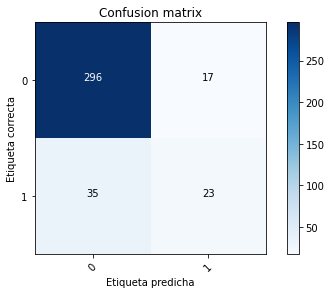

In [ ]:
from utils import plot_confusion_matrix

plot_confusion_matrix(cm, [0,1])

In [ ]:
# Se visualiza como una Dataframe las etiquetas originales y las etiquetas predichas
df_importancia_2 = pd.DataFrame({
                                #'features':features,
                                'etiqueta_original':y2_test,
                                'predicción': y_test_pred
                                })
df_importancia_2.sort_values(by='etiqueta_original', ascending=False, inplace=True)
df_importancia_2

,etiqueta_original,predicción
1670,1,0
1683,1,1
1586,1,0
1718,1,0
1775,1,0
...,...,...
1058,0,0
1161,0,0
768,0,1
1282,0,0


In [ ]:
# Se visualizan las observaciones que no fueron correctamente predichas por el modelo

df_importancia_3 = df_importancia_2[df_importancia_2.etiqueta_original!=df_importancia_2.predicción]
df_importancia_3

,etiqueta_original,predicción
1670,1,0
1586,1,0
1718,1,0
1775,1,0
1546,1,0
1558,1,0
1646,1,0
1599,1,0
1811,1,0
1764,1,0


In [ ]:
# Verificamos los casos mal etiquetados
df_importancia_3.shape

(52, 2)

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Seleccionamos valores para los hiperparámetros que vamos a probar

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

# Se define un diccionario con los distintos valores de los hiperparámetros que van a ser evaluados
parameter_options = {'loss' : ['hinge','log_loss','modified_huber'], # función de pérdida
        'learning_rate' : ['constant','adaptive','optimal'], # tasa de aprendizaje
        'penalty' : ['l2', 'l1', 'elasticnet'],
        'eta0' :[0.01,0.05,1, 2] } # regularizador


In [ ]:
# Se visualizan todas las combinaciones de parámetros que se van a evaluar
for params in ParameterGrid(parameter_options):
    print(params)

{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l2'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l1'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'elasticnet'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log_loss', 'penalty': 'l2'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log_loss', 'penalty': 'l1'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log_loss', 'penalty': 'elasticnet'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber', 'penalty': 'l2'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber', 'penalty': 'l1'}
{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
{'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l2'}
{'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'l1'}
{'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'hinge', 'penalty': 'elasticne

In [ ]:
# GridSearchCV implementa un método de "ajuste" y "puntuación". Lo definimos y configuramos:
clf_grid = GridSearchCV(SGDClassifier(random_state=0),param_grid=parameter_options, cv=5)


#### Buscamos los mejores hiperparámentros

In [ ]:
# Se entrenan todos los modelos
clf_grid.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0),
             param_grid={'eta0': [0.01, 0.05, 1, 2],
                         'learning_rate': ['constant', 'adaptive', 'optimal'],
                         'loss': ['hinge', 'log_loss', 'modified_huber'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
# Investigamos los mejores hiperparámetros encontrados
clf_grid.best_params_

{'eta0': 0.01,
 'learning_rate': 'constant',
 'loss': 'log_loss',
 'penalty': 'l2'}

In [ ]:
# Guardamos el mejor modelo
best_model = clf_grid.best_estimator_

In [ ]:
best_model

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss',
              random_state=0)

 #### Accuracy promedio y varianza para todas las configuraciones

In [ ]:
clf_grid.cv_results_

{'mean_fit_time': array([0.00939884, 0.0128386 , 0.01776357, 0.01187735, 0.01801548,
        0.03622952, 0.01454687, 0.0097815 , 0.02261057, 0.02068443,
        0.02841687, 0.05325556, 0.05009947, 0.04911146, 0.04906821,
        0.02286782, 0.04051185, 0.03484912, 0.02269793, 0.02066531,
        0.04376726, 0.0458343 , 0.03637242, 0.04499779, 0.0362927 ,
        0.05361848, 0.054038  , 0.00779133, 0.01641092, 0.01543956,
        0.00823812, 0.01579709, 0.01864643, 0.01565208, 0.01655755,
        0.02208967, 0.03228483, 0.03659434, 0.04765129, 0.10176105,
        0.06410561, 0.06835847, 0.080018  , 0.08346252, 0.05134921,
        0.02588167, 0.03897977, 0.07203183, 0.0517066 , 0.03687224,
        0.06281919, 0.0407012 , 0.06755905, 0.06817689, 0.01103501,
        0.02011685, 0.01016092, 0.01543655, 0.01785116, 0.01550403,
        0.01104326, 0.0078145 , 0.00695791, 0.01847572, 0.03215051,
        0.02637463, 0.02231774, 0.06547198, 0.04303684, 0.01856909,
        0.0349021 , 0.02809429,

In [ ]:
# Se transforman los resultados en una dataframe para que sea más sencillo analizarlos visualmete
import pandas as pd
results = clf_grid.cv_results_
df = pd.DataFrame(results)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009399,0.006078,0.002706,0.002888,0.01,constant,hinge,l2,"{'eta0': 0.01, 'learning_rate': 'constant', 'l...",0.868687,0.865320,0.872054,0.875000,0.861486,0.868509,0.004779,30
1,0.012839,0.008693,0.001648,0.001272,0.01,constant,hinge,l1,"{'eta0': 0.01, 'learning_rate': 'constant', 'l...",0.875421,0.858586,0.868687,0.878378,0.861486,0.868512,0.007655,29
2,0.017764,0.015509,0.001962,0.001625,0.01,constant,hinge,elasticnet,"{'eta0': 0.01, 'learning_rate': 'constant', 'l...",0.868687,0.868687,0.872054,0.878378,0.861486,0.869858,0.005482,21
3,0.011877,0.015106,0.007238,0.011250,0.01,constant,log_loss,l2,"{'eta0': 0.01, 'learning_rate': 'constant', 'l...",0.872054,0.868687,0.861953,0.891892,0.858108,0.870539,0.011747,1
4,0.018015,0.011972,0.011417,0.021617,0.01,constant,log_loss,l1,"{'eta0': 0.01, 'learning_rate': 'constant', 'l...",0.872054,0.868687,0.861953,0.891892,0.858108,0.870539,0.011747,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.021035,0.004201,0.002408,0.003343,2,optimal,log_loss,l1,"{'eta0': 2, 'learning_rate': 'optimal', 'loss'...",0.828283,0.851852,0.865320,0.868243,0.851351,0.853010,0.014136,52
104,0.030590,0.006724,0.002614,0.001997,2,optimal,log_loss,elasticnet,"{'eta0': 2, 'learning_rate': 'optimal', 'loss'...",0.824916,0.851852,0.838384,0.868243,0.861486,0.848976,0.015666,64
105,0.011521,0.004119,0.000814,0.000408,2,optimal,modified_huber,l2,"{'eta0': 2, 'learning_rate': 'optimal', 'loss'...",0.818182,0.797980,0.831650,0.871622,0.810811,0.826049,0.025259,79
106,0.018301,0.004644,0.001747,0.001177,2,optimal,modified_huber,l1,"{'eta0': 2, 'learning_rate': 'optimal', 'loss'...",0.801347,0.784512,0.828283,0.722973,0.861486,0.799720,0.046379,98


#### Accuracy para todas las configuraciones

In [ ]:
# Se analizan los resultados de Accuracy
accuracies = clf_grid.cv_results_['mean_test_score'] 
accuracies

array([0.86850942, 0.86851169, 0.86985849, 0.87053872, 0.87053872,
       0.87053872, 0.85907726, 0.85907953, 0.85975066, 0.86986077,
       0.86918509, 0.86986077, 0.86918964, 0.86918964, 0.86918964,
       0.86783374, 0.86783374, 0.86783374, 0.83077168, 0.85099645,
       0.84894895, 0.85232733, 0.85300983, 0.84897625, 0.82604878,
       0.79972017, 0.75923878, 0.86514697, 0.86514469, 0.86986987,
       0.86446901, 0.86581582, 0.86379561, 0.82604878, 0.81797707,
       0.8220061 , 0.86985849, 0.87053417, 0.86986077, 0.87053872,
       0.87053872, 0.86986304, 0.86783602, 0.86648467, 0.86783602,
       0.83077168, 0.85099645, 0.84894895, 0.85232733, 0.85300983,
       0.84897625, 0.82604878, 0.79972017, 0.75923878, 0.81659614,
       0.84153927, 0.81125671, 0.79972472, 0.82200382, 0.81255801,
       0.81729002, 0.8226704 , 0.81391391, 0.86986077, 0.87053417,
       0.87053417, 0.86919192, 0.86784284, 0.86986532, 0.86715807,
       0.86783374, 0.86783374, 0.83077168, 0.85099645, 0.84894

#### Desviación estándar para todas las configuraciones

In [ ]:
# Se evalúan las desviaciones obtenidas para cada modelo
std = clf_grid.cv_results_['std_test_score'] 
std

array([0.00477948, 0.00765499, 0.00548168, 0.01174666, 0.01174666,
       0.01174666, 0.01477928, 0.01428523, 0.01481821, 0.00782906,
       0.00685891, 0.00782906, 0.01228564, 0.01228564, 0.01228564,
       0.00657491, 0.00657491, 0.00657491, 0.02562814, 0.01494825,
       0.02918986, 0.00389177, 0.01413584, 0.01566586, 0.02525949,
       0.04637882, 0.07586743, 0.00892282, 0.01059553, 0.00953221,
       0.01369139, 0.01370883, 0.01371576, 0.03252011, 0.03245891,
       0.03802164, 0.00756683, 0.00840217, 0.00782906, 0.01135406,
       0.01135406, 0.01214656, 0.00687351, 0.0069917 , 0.00687351,
       0.02562814, 0.01494825, 0.02918986, 0.00389177, 0.01413584,
       0.01566586, 0.02525949, 0.04637882, 0.07586743, 0.02808874,
       0.02478522, 0.04462505, 0.02849981, 0.01562896, 0.02523362,
       0.02002297, 0.02723922, 0.04408934, 0.00782906, 0.00840217,
       0.00840217, 0.01188101, 0.01298522, 0.01154221, 0.00762878,
       0.00840367, 0.00840367, 0.02562814, 0.01494825, 0.02918

### Evaluamos el mejor modelo

In [ ]:
# Se obtienen las etiquetas predichas para el grupo de datos de entrenamiento y test.
y2_train_pred = best_model.predict(X2_train)
y2_test_pred = best_model.predict(X2_test)


#### Sobre el conjunto de entrenamiento

In [ ]:
# Se obtiene el reporte para los datos de entrenamiento
print(classification_report(y2_train, y2_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.83      0.32      0.46       251

    accuracy                           0.87      1483
   macro avg       0.85      0.65      0.70      1483
weighted avg       0.87      0.87      0.85      1483



#### Sobre el conjunto de evaluación

In [ ]:
# Se obtiene el reporte para los datos de validación
print(classification_report(y2_test, y2_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       313
           1       0.76      0.33      0.46        58

    accuracy                           0.88       371
   macro avg       0.82      0.65      0.69       371
weighted avg       0.87      0.88      0.86       371



#### Matriz de confusión - conjunto de evaluación

In [ ]:
confusion_matrix(y2_test, y2_test_pred)

array([[307,   6],
       [ 39,  19]], dtype=int64)

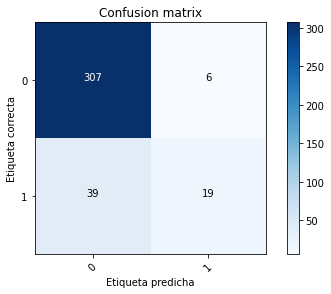

In [ ]:
cm2 = confusion_matrix(y2_test, y2_test_pred, labels=[0, 1])
plot_confusion_matrix(cm2, [0,1])

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X3 = X2.copy()
y3 = y2.copy()


# división entre entrenamiento y evaluación
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)


In [ ]:
X3.shape

(1854, 10)

In [ ]:
y3.shape

(1854,)

### Entrenamos el modelo

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='gini', splitter='best', 
                             max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features=None, random_state=0, 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             class_weight=None, ccp_alpha=0.0)
clf_tree.fit(X3_train, y3_train)

DecisionTreeClassifier(random_state=0)

### Predecimos

In [ ]:
y3_train_pred = clf_tree.predict(X3_train)
y3_test_pred = clf_tree.predict(X3_test)

### Evaluamos el modelo

#### Sobre el conjunto de entrenamiento

In [ ]:
print(classification_report(y3_train, y3_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



#### Sobre el conjunto de test

In [ ]:
print(classification_report(y3_test, y3_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       313
           1       0.63      0.67      0.65        58

    accuracy                           0.89       371
   macro avg       0.78      0.80      0.79       371
weighted avg       0.89      0.89      0.89       371



In [ ]:
# Sobre ambos
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y3_train, y3_train_pred)
test_acc = accuracy_score(y3_test, y3_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.89


#### Matriz de confusión Entrenamiento


In [ ]:
cm = confusion_matrix(y3_train, y3_train_pred, labels=[0, 1])
cm

array([[1232,    0],
       [   0,  251]], dtype=int64)

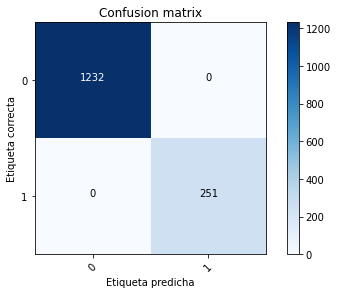

In [ ]:
# Graficamos la matriz de confusión sobre el conjunto de entrenamiento
plot_confusion_matrix(cm, [0,1])

In [ ]:
# Verificamos las etiquetas originales y las predichas del conjunto de entrenamiento
df_importancia_4 = pd.DataFrame({
                                'etiqueta_original':y3_train,
                                'predicción': y3_train_pred
                                })
df_importancia_4.sort_values(by='etiqueta_original', ascending=False, inplace=True)
df_importancia_4

,etiqueta_original,predicción
1626,1,1
1597,1,1
1640,1,1
1687,1,1
1694,1,1
...,...,...
1468,0,0
1136,0,0
145,0,0
613,0,0


In [ ]:
# Verificamos todos los registros que no se corresponden con clasificaciones positivas correctamente predichas

df_importancia_5 = df_importancia_4[df_importancia_4.etiqueta_original!=df_importancia_4.predicción]
df_importancia_5

,etiqueta_original,predicción


#### Matriz de Confusion Validacion

In [ ]:
cm_test = confusion_matrix(y3_test, y3_test_pred)

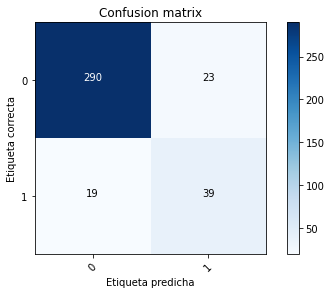

In [ ]:
# Graficamos la matriz de confusión sobre el conjunto de entrenamiento
plot_confusion_matrix(cm_test, [0,1])

**Conclusión**

Analizando los resultados obtenidos para la aplicación del modelo sobre los datos de entrenamiento y validación vemos que si bien el modelo se ajusta perfectamente a los datos de entrenamiento no lo hace con los datos de validación. Se observa que el accuracy obtenido para el conjunto de datos de entrenamiento es del 100% mientras que para los datos de validación baja al 89%. Esta situación podría deberse a que el modelo está sobre ajustado.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Seleccionamos valores para los hiperparámetros que vamos a probar

In [ ]:
# Se define un diccionario que contiene los hiperparámetros que se van a evaluar
parameter_options2 = {'criterion' : ['gini', 'entropy', 'log_loss'], 
        'max_depth' : [1,5,10,15,20], 
        'min_samples_leaf' : [1,5,10,15,20]
                     } 


In [ ]:
# Se visulizan las diferentes combinaciones de hiperparámetros que serán evaluadas.
for params in ParameterGrid(parameter_options2):
    print(params)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 15}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 15}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}
{'criteri

In [ ]:
# Se instancian todos los modelos
clf_grid2 = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=parameter_options2, cv=5,error_score=0)


#### Buscamos los mejores hiperparámentros

In [ ]:
# Se entrenan todos los modelos
clf_grid2.fit(X3_train, y3_train)

GridSearchCV(cv=5, error_score=0,
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15, 20]})

In [ ]:
# Investigamos los mejores hiperparámetros encontrados
clf_grid2.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [ ]:
# Guardamos el mejor modelo con los mejores hiperparámetros encontrados
best_model2 = clf_grid2.best_estimator_

In [ ]:
best_model2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

#### Accuracy promedio y varianza para todas las configuraciones

In [ ]:
clf_grid2.cv_results_

{'mean_fit_time': array([0.00413427, 0.00420871, 0.00652437, 0.00339818, 0.00455351,
        0.00936103, 0.01553488, 0.00976348, 0.00717669, 0.00946407,
        0.01751781, 0.01549549, 0.01162682, 0.01625137, 0.01367993,
        0.01877427, 0.01612248, 0.0190608 , 0.02700276, 0.0191689 ,
        0.03127356, 0.02258382, 0.01831198, 0.01754522, 0.02263503,
        0.00777631, 0.00970259, 0.00570192, 0.01370449, 0.00609293,
        0.02309952, 0.01834698, 0.01502266, 0.01961555, 0.02469168,
        0.03536386, 0.03113866, 0.02151151, 0.01859365, 0.01489568,
        0.02277389, 0.02543845, 0.02194438, 0.02711415, 0.019484  ,
        0.02678785, 0.02215667, 0.02417507, 0.01583238, 0.01499901,
        0.00599375, 0.00812826, 0.00296307, 0.00343566, 0.00686617,
        0.02094946, 0.01674814, 0.01497545, 0.02075105, 0.02084227,
        0.03602214, 0.02804914, 0.02148967, 0.02781882, 0.02418108,
        0.04622302, 0.02318625, 0.01794887, 0.02121449, 0.02244959,
        0.03581228, 0.03793874,

#### Accuracy para todas las configuraciones

In [ ]:
accuracies_tc = clf_grid2.cv_results_['mean_test_score'] 
accuracies_tc

array([0.86919419, 0.86919419, 0.86919419, 0.86919419, 0.86919419,
       0.87458367, 0.87391027, 0.87795068, 0.87796433, 0.86852989,
       0.87864455, 0.88134271, 0.87660388, 0.87324597, 0.86718309,
       0.86581809, 0.86785194, 0.87862863, 0.87324597, 0.86448949,
       0.85503686, 0.86650514, 0.87727728, 0.87324597, 0.86448949,
       0.86919419, 0.86919419, 0.86919419, 0.86919419, 0.86919419,
       0.8766107 , 0.87323915, 0.88064656, 0.87390345, 0.870541  ,
       0.86919647, 0.85234553, 0.86649149, 0.86447584, 0.86110201,
       0.86852079, 0.84828465, 0.86379561, 0.86447584, 0.86042861,
       0.87121895, 0.84828465, 0.86379561, 0.86447584, 0.86042861,
       0.86919419, 0.86919419, 0.86919419, 0.86919419, 0.86919419,
       0.8766107 , 0.87323915, 0.88064656, 0.87390345, 0.870541  ,
       0.86919647, 0.85234553, 0.86649149, 0.86447584, 0.86110201,
       0.86852079, 0.84828465, 0.86379561, 0.86447584, 0.86042861,
       0.87121895, 0.84828465, 0.86379561, 0.86447584, 0.86042

#### Desviación estándar para todas las configuraciones

In [ ]:
std_tc = clf_grid2.cv_results_['std_test_score'] 
std_tc

array([0.00925386, 0.00925386, 0.00925386, 0.00925386, 0.00925386,
       0.01434211, 0.01302948, 0.00719662, 0.01291846, 0.01678055,
       0.02277   , 0.01935866, 0.01303508, 0.0203265 , 0.02462768,
       0.02184941, 0.02342526, 0.01326081, 0.0203265 , 0.0246841 ,
       0.0162607 , 0.02429047, 0.01355839, 0.0203265 , 0.0246841 ,
       0.00925386, 0.00925386, 0.00925386, 0.00925386, 0.00925386,
       0.00855347, 0.00906472, 0.00345626, 0.01059874, 0.01130488,
       0.01603879, 0.0169377 , 0.00535584, 0.00897616, 0.01533488,
       0.01174003, 0.01392215, 0.00487845, 0.00897616, 0.01505846,
       0.01219138, 0.01392215, 0.00487845, 0.00897616, 0.01505846,
       0.00925386, 0.00925386, 0.00925386, 0.00925386, 0.00925386,
       0.00855347, 0.00906472, 0.00345626, 0.01059874, 0.01130488,
       0.01603879, 0.0169377 , 0.00535584, 0.00897616, 0.01533488,
       0.01174003, 0.01392215, 0.00487845, 0.00897616, 0.01505846,
       0.01219138, 0.01392215, 0.00487845, 0.00897616, 0.01505

### Evaluamos el mejor modelo

In [ ]:
# Se obtienen las etiquetas predichas para el grupo de datos de entrenamiento y test.
y3_train_pred = best_model2.predict(X3_train)
y3_test_pred = best_model2.predict(X3_test)


#### Sobre el conjunto de entrenamiento

In [ ]:
# Se obtiene el reporte para los datos de entrenamiento
print(classification_report(y3_train, y3_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1232
           1       0.89      0.68      0.77       251

    accuracy                           0.93      1483
   macro avg       0.92      0.83      0.87      1483
weighted avg       0.93      0.93      0.93      1483



#### Sobre el conjunto de evaluación

In [ ]:
# Se obtiene el reporte para los datos de validación
print(classification_report(y3_test, y3_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       313
           1       0.76      0.55      0.64        58

    accuracy                           0.90       371
   macro avg       0.84      0.76      0.79       371
weighted avg       0.90      0.90      0.90       371



#### Matriz de confusión - conjunto de evaluación

In [ ]:
confusion_matrix(y3_test, y3_test_pred)

array([[303,  10],
       [ 26,  32]], dtype=int64)

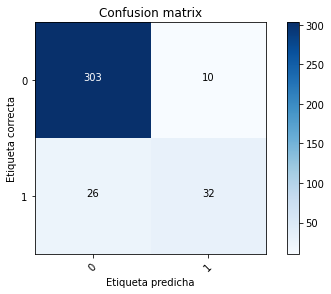

In [ ]:
cm2 = confusion_matrix(y3_test, y3_test_pred, labels=[0, 1])
plot_confusion_matrix(cm2, [0,1])

**Conclusión**

Luego de realizar el ajuste de hiperparámetros obtuvimos un modelo ligeramente mejor, en términos de accuracy, que el modelo anterior. 

Según nuestro criterio, los modelos obtenidos no son suficientemente buenos para predecir a las personas que no van a pagar el crédito recibido. Esto podría deberse al desbalance que existe en el dataset, en donde la gran mayoría de los datos corresponden a personas que sí pagaron el crédito y una parte menor a quienes no pagaron. Una manera de solucionar este problema sería aumentar el número de datos intentando balancear el dataset entre quienes pagaron y no pagaron el crédito otorgado.